In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array

In [3]:
train = tf.keras.utils.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Colab_Notebooks/Sitting_posture/dataset_pose',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=9, 
    validation_split=0.2,
    subset='training'
)

print(type(train))

Found 453 files belonging to 2 classes.
Using 363 files for training.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [4]:
val= tf.keras.utils.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Colab_Notebooks/Sitting_posture/dataset_pose',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=9, 
    validation_split=0.2,
    subset='validation'
)

print(type(val))

Found 453 files belonging to 2 classes.
Using 90 files for validation.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    #Dropout(0.2),
    Dense(32, activation='relu'),
    #Dropout(0.2),
    Dense(2, activation='softmax')
])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']   
)

In [6]:
history=model.fit(
  train,
  validation_data=val,
  epochs=20,
  callbacks=[callback]
)

Epoch 1/20
12/12 [==============================] - 165s 4s/step - loss: 12.8443 - accuracy: 0.5124 - val_loss: 1.2211 - val_accuracy: 0.6778
Epoch 2/20
12/12 [==============================] - 6s 453ms/step - loss: 0.7003 - accuracy: 0.6171 - val_loss: 0.6888 - val_accuracy: 0.8556
Epoch 3/20
12/12 [==============================] - 6s 454ms/step - loss: 0.6228 - accuracy: 0.7218 - val_loss: 0.7742 - val_accuracy: 0.6000
Epoch 4/20
12/12 [==============================] - 6s 456ms/step - loss: 0.4493 - accuracy: 0.8044 - val_loss: 0.3178 - val_accuracy: 0.8889
Epoch 5/20
12/12 [==============================] - 6s 461ms/step - loss: 0.3088 - accuracy: 0.8650 - val_loss: 0.3105 - val_accuracy: 0.8111
Epoch 6/20
12/12 [==============================] - 6s 464ms/step - loss: 0.2594 - accuracy: 0.9036 - val_loss: 0.1808 - val_accuracy: 0.9111
Epoch 7/20
12/12 [==============================] - 6s 463ms/step - loss: 0.2001 - accuracy: 0.9201 - val_loss: 0.3128 - val_accuracy: 0.8889
Epoch 

In [ ]:
model.save('/content/gdrive/MyDrive/Colab_Notebooks/Sitting_posture/Sit_Well_VGGNet')

ValueError: ignored

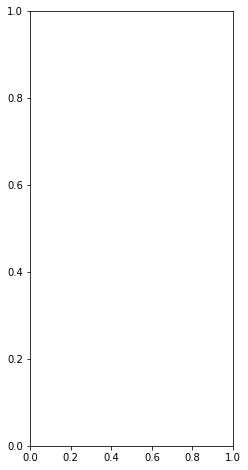

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()